
# Importing Essential Libraries for Data Analysis and Machine Learning

This code cell imports the necessary libraries for data manipulation, visualization, model building, and evaluation:

Key functions of each library:

- numpy: Efficient numerical computations and array operations.
- pandas: Data manipulation and analysis using DataFrames.
- seaborn: Statistical visualizations built on matplotlib.
- matplotlib.pyplot: Creation of various plots and charts.
- sklearn.model_selection: Splitting data into training and testing sets, hyperparameter tuning.
- sklearn.preprocessing: Scaling and encoding data for machine learning.
- sklearn.neighbors: Implementation of the k-Nearest Neighbors (KNN) algorithm.
- sklearn.metrics: Model performance evaluation using metrics like classification report.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Loading and Exploring the Diabetes Dataset

This code block dives into exploring the "diabetes_dataset.csv" using pandas. After loading it, we peek at the first few rows to get a general feel. Then, we delve deeper, examining data types, missing values, and descriptive statistics for numerical columns. We also focus on the 'smoking_history' category, uncovering its value distribution. Finally, we group the data by diabetes status and compare group means for a deeper understanding of how various features differ between individuals with and without the disease. This comprehensive exploration paints a clear picture of the data, laying a solid foundation for further analysis and potential model building.

In [5]:
data = pd.read_csv("diabetes_dataset.csv", index_col=False)
data.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
data['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [9]:
# data.groupby('diabetes', numeric_only=True).mean()

In [10]:
data.shape

(100000, 9)


# Visualizing Relationships within the Diabetes Dataset

Here's a breakdown of the code and its visual outcomes:

###Pairwise Relationships:

- Generates a comprehensive grid of scatter plots, depicting pairwise relationships between all numerical columns in the dataset.
- Colors data points based on the 'diabetes' status (True/False), allowing for visual exploration of potential differences between groups.

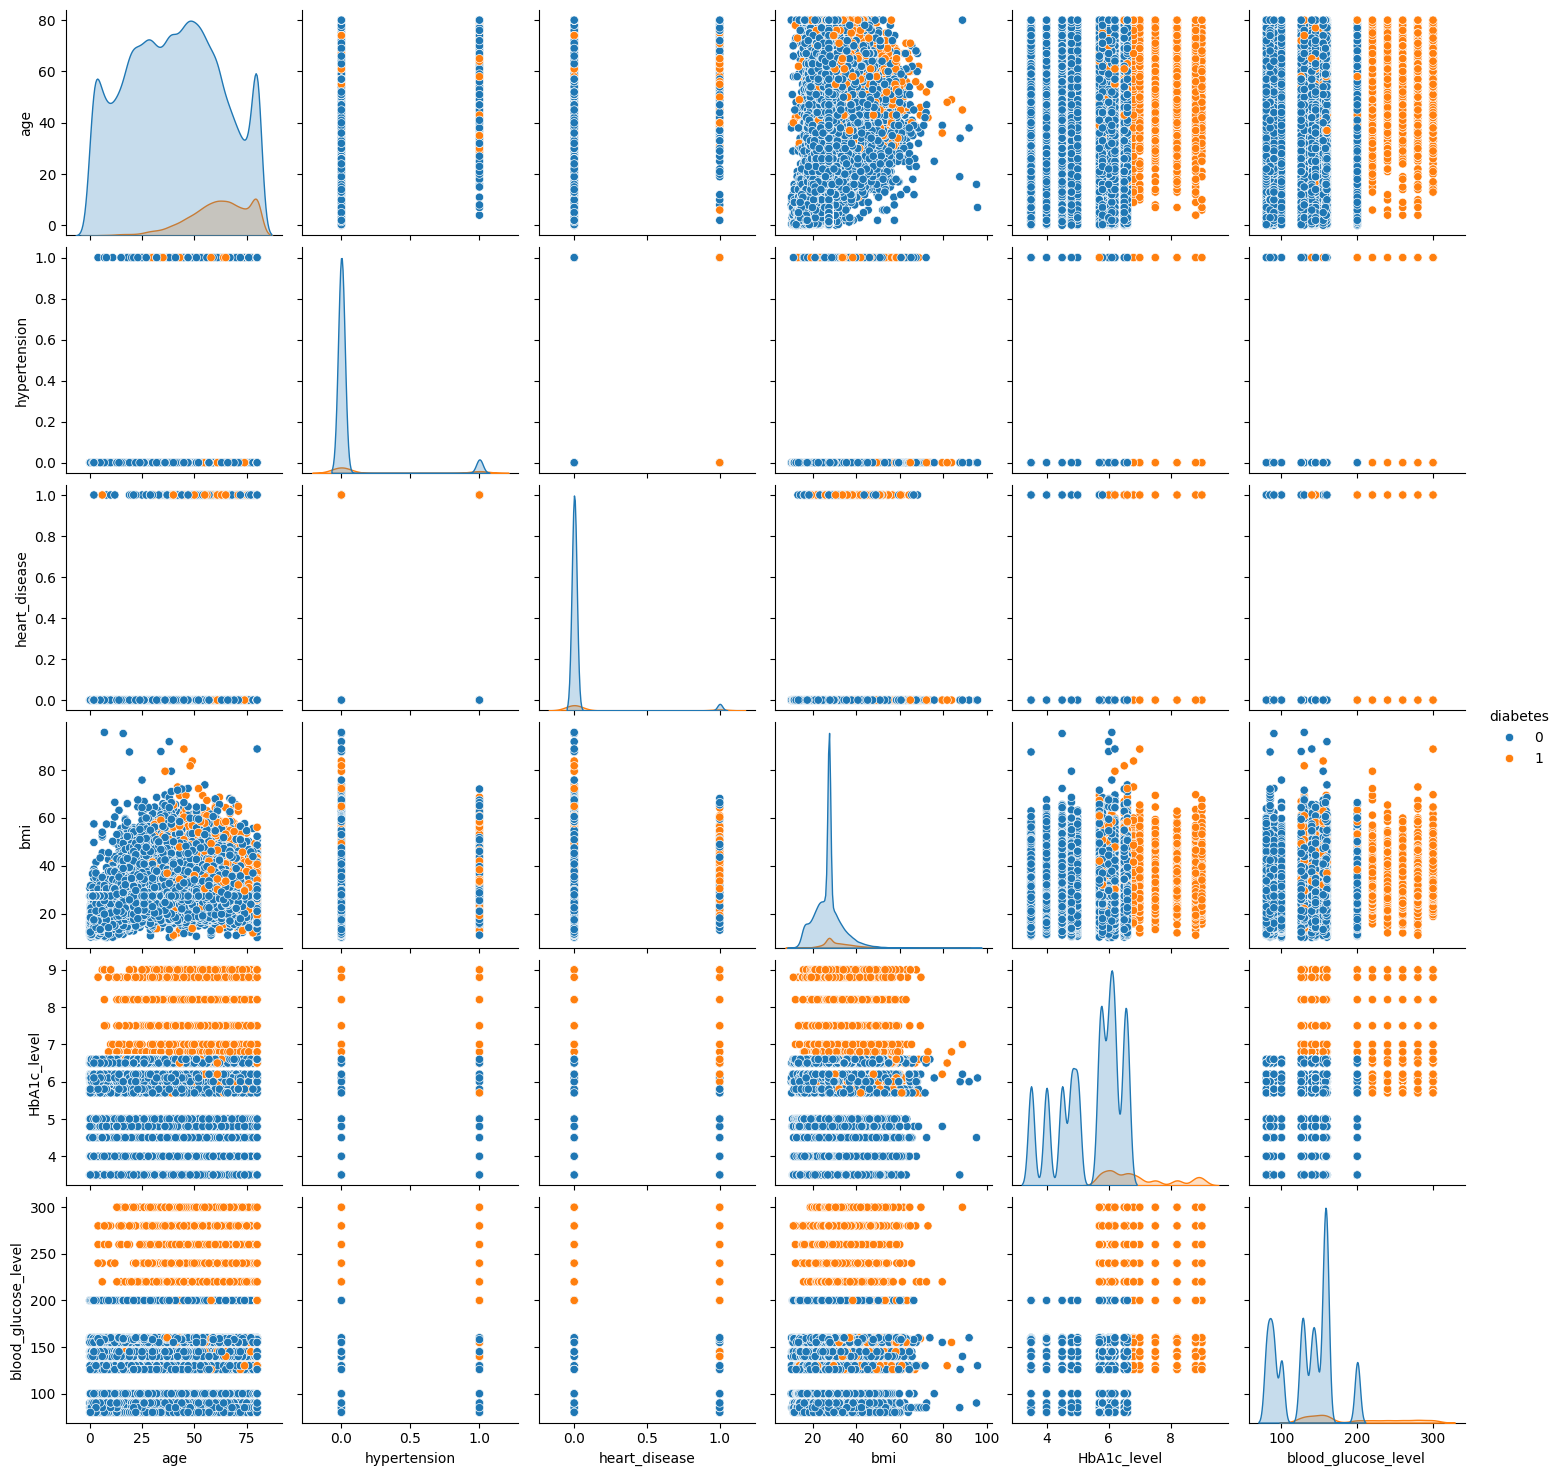

In [11]:
sns.pairplot(data,hue="diabetes")

<BarContainer object of 10000 artists>

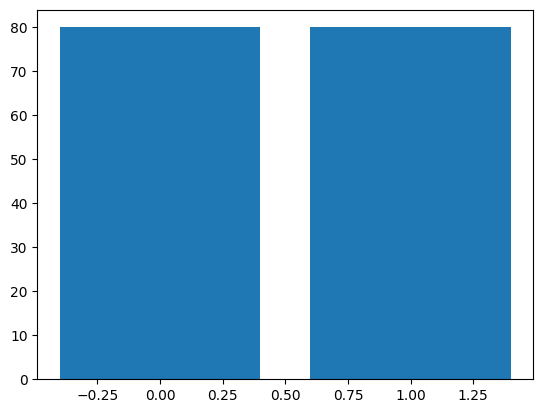

In [12]:
plt.bar(data['diabetes'][:10000],data['age'][:10000])

<BarContainer object of 100 artists>

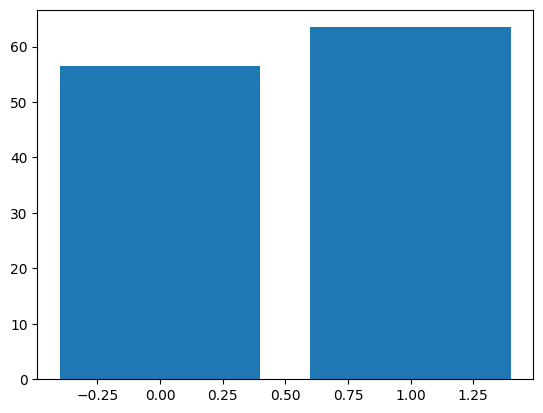

In [13]:
plt.bar(data['diabetes'][:100],data['bmi'][:100])

# Visualizing Relationships between Age, Health Features, and Diabetes Status

Key Goal: To visually explore relationships between age and various health-related features in the context of diabetes status.

###Individual Plots:

- Each line creates a scatter plot:
  - `sns.scatterplot()` is a Seaborn function for generating scatter plots.

Structure:
- `x='feature_name'` : Places the specified feature on the x-axis.
- `y='age'` : Places age on the y-axis.
- `data=data` : Uses the first rows of the DataFrame for plotting.
`hue=data['diabetes'][:10000]` : Colors data points based on diabetes status (True/False).

###Features Explored:

- BMI (Body Mass Index)
- HbA1c_level (glycated hemoglobin, a blood sugar marker)
- Heart Disease
- Hypertension
- Blood Glucose Level
- Visual Insights:

###These plots allow you to:
- Observe potential patterns or trends between age and these features.
- Identify differences in these relationships between individuals with and without diabetes.
- Uncover potential risk factors or patterns relevant for understanding diabetes.

###Overall Purpose:

To gain visual insights into how age interacts with important health factors in relation to diabetes status, aiding in data exploration and potential model building.

<Axes: xlabel='bmi', ylabel='age'>

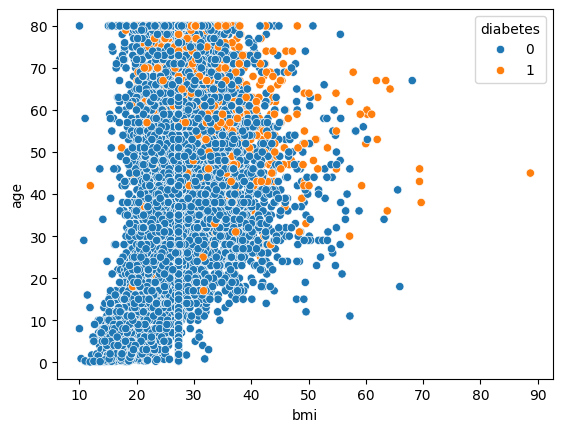

In [14]:
sns.scatterplot(x=data['bmi'][:10000],y=data['age'][:10000],data=data,hue=data['diabetes'][:10000])

<Axes: xlabel='HbA1c_level', ylabel='age'>

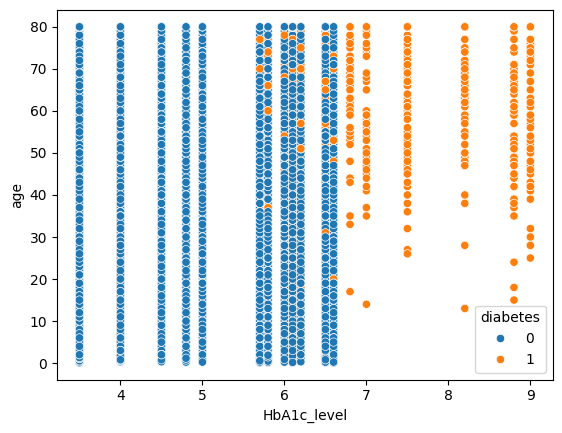

In [15]:
sns.scatterplot(x=data['HbA1c_level'][:10000],y=data['age'][:10000],data=data,hue=data['diabetes'][:10000])


<Axes: xlabel='heart_disease', ylabel='age'>

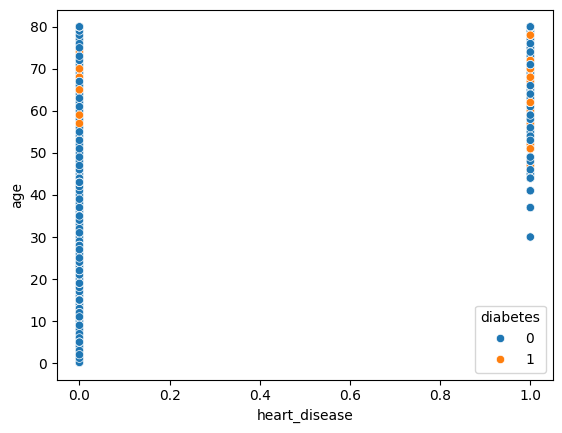

In [16]:
sns.scatterplot(x=data['heart_disease'][:10000],y=data['age'][:10000],data=data,hue=data['diabetes'][:10000])


<Axes: xlabel='hypertension', ylabel='age'>

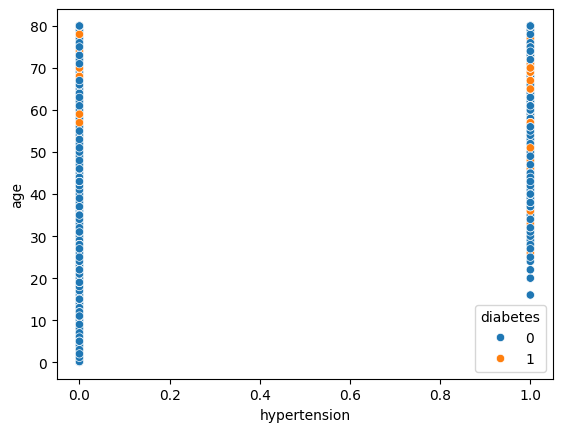

In [17]:
sns.scatterplot(x=data['hypertension'][:10000],y=data['age'][:10000],data=data,hue=data['diabetes'][:10000])

<Axes: xlabel='blood_glucose_level', ylabel='age'>

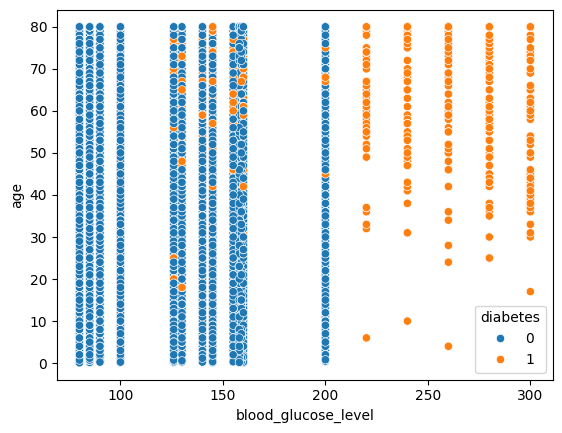

In [18]:
sns.scatterplot(x=data['blood_glucose_level'][:10000],y=data['age'][:10000],data=data,hue=data['diabetes'][:10000])



# Data Preprocessing Steps

Here's a breakdown of the code's actions:

1. Encoding Categorical Data:

- `le = LabelEncoder()` : Creates a LabelEncoder object for transforming categorical data into numerical values.
- `data['gender'] = le.fit_transform(data['gender'])` :
  - Fits the encoder to the 'gender' column.
  - Transforms text-based genders into numerical codes (0 or 1, likely).

2. Filtering Data:

- `df = data[data['gender'] != 2]` : Creates a new DataFrame 'df' containing only rows where 'gender' is not equal to 2.

- `df['gender'].value_counts()` : Counts the occurrences of each remaining gender code in the filtered DataFrame.

3. Dropping a Column:

- `df.drop('smoking_history', axis=1, inplace=True)` : Removes the 'smoking_history' column from the DataFrame.

4. Removing Duplicates:

- `df.drop_duplicates(inplace=True)` : Drops any duplicate rows, keeping only unique entries.

- `print(df.duplicated().sum())` : Prints the total number of remaining duplicates (should be 0)

In [19]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
df = data[data['gender']!=2]
df['gender'].value_counts()

gender
0    58552
1    41430
Name: count, dtype: int64

In [20]:
df.drop('smoking_history',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


/var/folders/17/f8plwrn95gl9rpztgtcw93g00000gn/T/ipykernel_39057/931164848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('smoking_history',axis=1,inplace=True)
/var/folders/17/f8plwrn95gl9rpztgtcw93g00000gn/T/ipykernel_39057/931164848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [21]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0


<Axes: xlabel='gender', ylabel='age'>

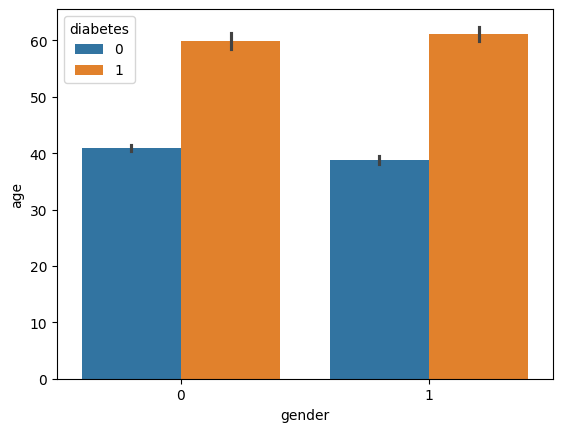

In [22]:
sns.barplot(data=df,x=df["gender"][:10000],y=df["age"][:10000],hue=df["diabetes"][:10000])

<Axes: >

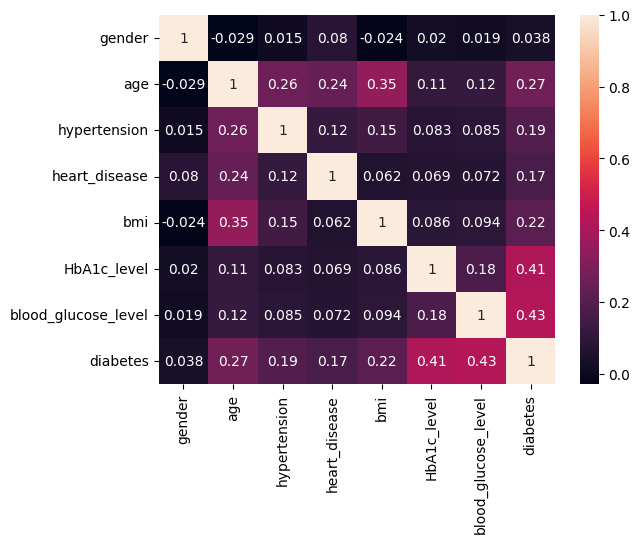

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
x = df.drop("diabetes",axis=1)
y = df['diabetes']


# Splitting Data and Scaling Features

1. Separating Features and Target:

- `x = df.drop("diabetes", axis=1)` : Stores all columns except 'diabetes' in `x` (features).
- `y = df['diabetes']` : Stores the 'diabetes' column in `y` (target variable).

2. Scaling Features:

- `scaler = MinMaxScaler()` : Creates a MinMaxScaler object to scale features between 0 and 1.
- `x = scaler.fit_transform(x)` :
  - Fits the scaler to the features in `x`.
  - Transforms the features into the scaled range.

3. Splitting Data:

- `train_test_split()` : Used twice for stratified and random splits:
  - Initial split:
     - Divides data into 80% training (`x_train`, `y_train`) and 20% testing (`x_test`, `y_test`).
     - `stratify=y` ensures balanced proportions of diabetes classes in both sets.
    
 - Further split:
   - Divides the testing set into 50% testing (`x_test`, `y_test`) and 50% validation (`x_val`, `y_val`).

4. Checking Data Splits and Samples:

- Shapes:
  - `print(x_train.shape,y_train.shape)` : Shows the dimensions of the training data (features and target variable).
  - `print(x_test.shape,y_test.shape)` : Shows the dimensions of the testing data (features and target variable).
  - `print(x_val.shape,y_val.shape)` : Shows the dimensions of the validation data (features and target variable).

- Samples:

  - `print(x_train[:5],y_train[:5])` : Prints the first 5 rows of features and corresponding target values from the training set.
  - `print(x_test[:5],y_test[:5])` : Prints the first 5 rows of features and corresponding target values from the testing set.
  - `print(x_val[:5],y_val[:5])` : Prints the first 5 rows of features and corresponding target values from the validation set.

In [25]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.        , 1.        , 0.        , ..., 0.17717087, 0.56363636,
        0.27272727],
       [0.        , 0.67467467, 0.        , ..., 0.20203081, 0.56363636,
        0.        ],
       [1.        , 0.34934935, 0.        , ..., 0.20203081, 0.4       ,
        0.35454545],
       ...,
       [1.        , 0.82482482, 0.        , ..., 0.20798319, 0.4       ,
        0.34090909],
       [0.        , 0.2992993 , 0.        , ..., 0.29656863, 0.09090909,
        0.09090909],
       [0.        , 0.71221221, 0.        , ..., 0.14495798, 0.56363636,
        0.04545455]])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test,test_size=0.5, random_state=42)

In [27]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape,y_val.shape)

print(x_train[:5],y_train[:5])
print(x_test[:5],y_test[:5])
print(x_val[:5],y_val[:5])

(73036, 7) (73036,)
(9129, 7) (9129,)
(9130, 7) (9130,)
[[1.         0.7997998  0.         1.         0.20203081 0.
  0.29545455]
 [1.         0.43693694 0.         0.         0.17261905 0.45454545
  0.54545455]
 [0.         0.71221221 1.         0.         0.2089169  0.27272727
  0.02272727]
 [1.         0.06156156 0.         0.         0.06419234 0.
  0.27272727]
 [1.         0.34934935 0.         0.         0.20203081 0.41818182
  0.02272727]] 6038     0
63185    0
86742    0
28813    0
53164    0
Name: diabetes, dtype: int64
[[0.         0.44944945 0.         0.         0.13842204 0.49090909
  0.27272727]
 [1.         0.00900901 0.         0.         0.01342204 0.09090909
  0.54545455]
 [1.         0.4994995  0.         0.         0.15441176 0.
  0.02272727]
 [1.         0.47447447 0.         0.         0.16911765 0.23636364
  0.22727273]
 [0.         0.33683684 0.         0.         0.14028945 0.49090909
  0.54545455]] 85902    0
84335    0
12017    0
1930     0
6074     0
Name: d

# Hyperparameter Tuning, Prediction, and Model Saving

### Hyperparameter Tuning with GridSearchCV:

- GridSearchCV setup:
  - Defines a grid of hyperparameter combinations for the KNeighborsClassifier:
   - `n_neighbors` (number of neighbors): [3, 5, 7, 9, 11, 13]
   - `weights` : ['uniform', 'distance'] (voting weights for neighbors)
   - `metric` : ['euclidean', 'manhattan'] (distance measure)
  - Specifies scoring='recall' to prioritize recall during evaluation.
  - Employs 5-fold cross-validation (cv=5) for robust evaluation.

- Finding the best model:
  - Fits GridSearchCV to the training data to find the best hyperparameter configuration.
  - Retrieves the best model using grid.best_estimator_.

### Evaluation on Test and Validation Sets:

- Predictions:
  - Makes predictions on both test and validation sets using the best model.

- Performance assessment:
  - Generates classification reports to evaluate model performance on both sets, focusing on recall.

### Making Predictions for New Users:

- Preparing user data:
  - Reshapes user data into a 2D array with a single row.
  - Scales user data using the pre-trained MinMaxScaler to ensure consistency with model training.

- Predicting:
  - Uses the best KNN model to predict diabetes status for the scaled user data.

### Saving the Model and Scaler:

- Storing for future use:
  - Employs joblib to save the best KNN model and MinMaxScaler for future predictions and reusability.

In [28]:
# Hyperparameter tuning with GridSearchCV
k_values = [3, 5, 7, 9, 11, 13]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']

param_grid = {'n_neighbors': k_values, 'weights': weights, 'metric': metric}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='recall', cv=5)
grid.fit(x_train, y_train)

# Get the best model
best_model = grid.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)
y_pred_val = best_model.predict(x_val)
# Evaluate performance
print(classification_report(y_test, y_pred,target_names=['Non Diabetes Patients','Diabetes Patients']))
print(classification_report(y_val, y_pred_val,target_names=['Non Diabetes Patients','Diabetes Patients']))


                       precision    recall  f1-score   support

Non Diabetes Patients       0.97      0.98      0.98      8295
    Diabetes Patients       0.80      0.69      0.74       834

             accuracy                           0.96      9129
            macro avg       0.88      0.84      0.86      9129
         weighted avg       0.95      0.96      0.95      9129

                       precision    recall  f1-score   support

Non Diabetes Patients       0.97      0.99      0.98      8275
    Diabetes Patients       0.83      0.68      0.75       855

             accuracy                           0.96      9130
            macro avg       0.90      0.83      0.86      9130
         weighted avg       0.95      0.96      0.95      9130



In [29]:
grid.best_params_


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [43]:
# user = [1,42,0,0,33.64,4.8,145]
user = [1, 42, 0, 0, 33.64, 4.8, 145]

# Reshape and scale user data
re_user = np.array(user).reshape(1, -1)

scaled_user = scaler.transform(re_user)  # Transform using pre-trained scaler
print(scaled_user)
# Make prediction
prediction = grid.predict(re_user)
print(prediction)

[[1.         0.52452452 0.         0.         0.27579365 0.23636364
  0.29545455]]
[1]


/Users/safeemmohammed/Desktop/Huzaifa/poly-capstone/diabetes-prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [42]:
user = [0,30.0,0,0,27.01,6.2,145]
# user = [1, 44, 1, 1, 19.31, 6.5, 200]

# Reshape and scale user data
np_user = np.asarray(user)
re_user = np_user.reshape(1,-1)
scaled_user = scaler.transform(re_user)  # Transform using pre-trained scaler
print(scaled_user)
# Make prediction
prediction = grid.predict(scaled_user)

print(prediction)

[[0.         0.37437437 0.         0.         0.1984127  0.49090909
  0.29545455]]
[0]


/Users/safeemmohammed/Desktop/Huzaifa/poly-capstone/diabetes-prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
scaler.feature_names_in_

array(['gender', 'age', 'hypertension', 'heart_disease', 'bmi',
       'HbA1c_level', 'blood_glucose_level'], dtype=object)

In [33]:
from joblib import dump

# Assuming your model is named 'grid' and scaler is named 'scaler'
dump(grid, 'Diabetes_model(KNN).joblib')
dump(scaler, 'Diabetes_model_scalar.joblib')

['Diabetes_model_scalar.joblib']